# Classification Problems

Steve Pittard wsp@emory.edu (citations to other sources are inline) 

Next up we consider the issue of building a model to predict a binary (e.g. “yes” / “no” or “positive /”negative“) outcome although we might also predict more than one class. For the sake of explanation we’ll keep our attention to the ”two class" situation although there are multi-classification possibilities.

<img src="./pics/flow2.png" width=700 height=700>

## Performance Measures

With Linear Regression we were predicting a continuous outcome with the goal of being able to minimize the RMSE (root mean square error). In classification problems we need a metric or “performance measure” that we can use to judge the effectiveness of any model we create. Typically in classification we would be predicting some binary outcome such as whether someone has a disease or not. In this case it would not make sense to use something like RMSE. 

Other measures such as Accuracy, Precision, or Sensitivity are more appropriate. An example might help - we’ll be spending some time (alot) with the PimaIndiansDiabetes which, as you can guess, relates to Diabetes. From the mighty Wikipedia:

> Diabetes mellitus (DM), commonly known as diabetes, is a group of metabolic disorders characterized by high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

Moreover,

> As of 2017, an estimated 425 million people had diabetes worldwide (around 5.5%)

This dataset has particular historic significance to Predictive Modeling as it was used in the [following paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf) from 1988 which described the use of an early neural network model to predict diabetes in Pima Indians.

<img src="pics/adap.png" width ="500" height=500>

The paper outlines the following:

> The population for this study was the Pima Indian population near Phoenix, Arizona. That population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes. Each community resident over 5 years of age was asked to undergo a standardized examination every two years, which included an oral glucose tolerance test. 

> Diabetes was diagnosed according to World Health Organization Criteria; that is, if the 2 hour post-load plasma glucose was at least 200 mg/dl (11.1 mmol/l) at any survey examination or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.

In [126]:
import pandas as pd

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/pima.csv"
pm = pd.read_csv(url, sep=',')

# Get the dimensions
print("\npm dimensions:",pm.shape)

# See what data we have
pm.head()

# Get some info
pm.info()



pm dimensions: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   triceps   768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


The description of the data set is as follows:

<img src="pics/pima_desc.png" width ="500" height=500>

So we now have some data on which we can build a model. Specifically, there is a variable in the data called “diabetes” which indicates the disease / diabetes status (“pos” or “neg”) of the person. It would be good to come up with a model that we could use with incoming data to determine if someone has diabetes.

## Important Terminology

In predictive modeling there are some common terms to consider:

<img src="pics/features2.png" width ="500" height=500>

In [140]:
# How many in each class?
pm.diabetes.value_counts()

diabetes
neg    500
pos    268
Name: count, dtype: int64

## A Basic Model

Since we are attempting to predict a binary outcome here (“pos” or “neg”) we’ll need to use something other than linear regression which is used to predict numeric outcomes. We’ll go with Logistic Regression as it is a tried and true method for doing this type of thing. We’ll split the data into a train / test pair.

<img src="pics/orr.png" width ="500" height=500>

We'll also want to separate our data into a set of one or more **predictor variables** that we then use to predict the target variable which in this case is the **diabetes** column wherein a value of "pos" means that they are positive for diabetes and a value of "neg" means that they do not. Fairly strightforward. We will also want to scale the predictor values since if we don't then the logistic regression function will complain. We will talk more about scaling in a later chapter. 

In [127]:
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split

# Specify the predictor data 
X = pm.iloc[:,0:8]

# Specify the target labels and flatten the array to make it consumable
# by scikit-learn functions

y = np.ravel(pm.diabetes)

# Scale the predictor data
X_scaled = preprocessing.scale(X)

# Import the train / test module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,
                                                    test_size=0.20,
                                                    random_state=0)

Check out the data. It's now been scaled so it looks different. Note that the "y" or outcome variable has not been scaled because it wouldn't make sense to do so. 

In [137]:
# Notice that X is missing the target column named diabetes
# That's what we want
print("\nFirst 10 Rows of Predictor variables:\n",X_train[0:10,:].round(2))

# Print y
print("\nTarget variable:\n",y_train[0:10])

# Dimensions of Train
print("\nTrain dimensions:\n",X_train.shape)

# Dimensions of Test
print("\nTest Dimensions:\n",X_test.shape)



First 10 Rows of Predictor variables:
 [[ 0.94  0.91  0.46  0.53  0.4   0.41  0.66  1.77]
 [ 0.05 -0.75 -0.47  0.15 -0.69 -0.48 -0.09 -0.96]
 [-1.14  1.38  1.08  0.78  5.21  2.58 -0.14 -0.87]
 [-0.84 -0.37 -0.68  0.03  0.48 -0.86  1.09 -0.87]
 [ 1.23 -0.03 -3.57 -1.29 -0.69 -0.25 -0.87  0.4 ]
 [ 2.12  0.44 -3.57 -1.29 -0.69  2.58  0.32  0.58]
 [ 1.83  1.26 -0.06  0.15  0.45 -0.82 -0.44  1.17]
 [ 0.64  2.29  0.46 -1.29 -0.69 -1.08 -1.04  2.19]
 [-0.84 -1.56 -1.09 -0.16 -0.03 -1.47 -0.45 -0.96]
 [-0.55  0.03 -0.47 -0.16  0.23 -0.28  0.74 -0.96]]

Target variable:
 ['pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg']

Train dimensions:
 (614, 8)

Test Dimensions:
 (154, 8)


So the next step is to build a model using the **LogisticRegression** estimator. Of course, everything we learned last week will still apply in terms of the **fit** and **predict** methods. 

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train,y_train)

# Predict y probs on the training data
y_train_pred_probs = logreg.predict_proba(X_train)

# Predict y labels on the training data
y_train_pred_labs = logreg.predict(X_train)

# These are the labelled predictions. These are not the probabilities
print("\nFirst 10 Y training prediction probabilities:\n",y_train_pred_probs[0:9])

# These are the labelled predictions. These are not the probabilities
print("\nFirst 10 Y training prediction labels:\n",y_train_pred_labs[0:9])

# Get the Score
print("\nTraining Score:\n",round(logreg.score(X_train,y_train),2))



First 10 Y training prediction probabilities:
 [[0.23336627 0.76663373]
 [0.87304985 0.12695015]
 [0.31070087 0.68929913]
 [0.86188224 0.13811776]
 [0.46326927 0.53673073]
 [0.03784895 0.96215105]
 [0.34884765 0.65115235]
 [0.23091616 0.76908384]
 [0.9783287  0.0216713 ]]

First 10 Y training prediction labels:
 ['pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg']

Training Score:
 0.76


What do we get back from our prediction ? These are probabilities that, for each row in the training data frame, represent the likelihood of that person being positive for diabetes. The trick then is to figure out the threshold value (aka “alpha value”) over which we would classify the person as being positive for diabetes. 

Most people will generally pick 0.5 although the returned logistic object allows us to request either the probabilities that something is, in this case, negative or positive according to that threshold. The default **predict** function gives us labels whereas **predict_proba** gives us probabilities. In the latter case, we can compare which column is greater and make a decision based on that. We could also focus on the second column to make the decision.

In [139]:
my_labs = np.where(y_train_pred_probs[:,1] < 0.5,"neg","pos")
print(my_labs[0:9])

['pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg']


For now, we'll stick with what we get back from the predict method but we will return to the idea of seeing how varying the threshold might (or not) result in greater accuracy for the model.

## Confusion Matrix

Next, we'll create what is known as a confusion matrix which is basically the result of a cross tabulation operation.  Keep in mind that a confusion matrix is a key construct in machine learning in terms of classification because we can derive so many interesting ratios from it. 

So much so that we have devoted and entire lecture to it as most of the common metrics we might use to evaluate a predictive model can be dervied from it. 

Creating a confusion matrix is pretty easily done altough interpreting can be an involved process. Just remember it is a type of **contingency table** which is something discussed as far back as 1904 by [Karl Pearson](https://archive.org/details/cu31924003064833/page/n35/mode/2up). The idea of comparing observations and responses and the famous ROC Curve was further developed in 1954 by [Peterson, Birdsall, and Fox](https://ieeexplore.ieee.org/document/1057460/authors#authors). 

So here is a visual breakdown of what we are about to do. Actually you should already know how to create a contingency table so consider this a review. Let's conisder the following two lines with the top one being the known or actual value of whether someone has diabetes. The second line is our prediction from some model. 

The next line compares our prediction against the actual value after which we categorize our prediction accordingly into one of 4 categories: True Negative, False Positive, False Negative, True Positive. Then we TABULATE / count them and present them in a table. Note that the rows represent reality and the columns represent our predictions.

<img src = "./pics/ch_6_cm2.png" />


So next up, let's apply this concept to the pima Indians data frame. Here, I will create data frame and then use the **crosstab** method directly available for panda dataframes to produce the table.


In [78]:
compare_preds_training = pd.DataFrame({'predicted':y_train_pred_labs.tolist(),
                                       'actual_labs':y_train})
# Use crosstabs
confusion_matrix_train = pd.crosstab(compare_preds_training['actual_labs'], 
                                     compare_preds_training['predicted'], 
                                     rownames=['Actual'], colnames=['Predicted'])
# Check out the table / matrix
confusion_matrix_train

Predicted,neg,pos
Actual,,
neg,341,52
pos,94,127


In [79]:
print("Train Accuracy:",round(confusion_matrix_train.values.diagonal().sum() / confusion_matrix_train.values.sum(),2))

Train Accuracy: 0.76


It's worth pointing out that sklearn has a function that will compute the confusion matrix for us - even though it wasn't particularly hard for us to do it ourselves. Sometimes this is not the case and we should probably rely on scikit when we can.

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(compare_preds_training['actual_labs'],
                 compare_preds_training['predicted'])
print(cm)

[[341  52]
 [ 94 127]]


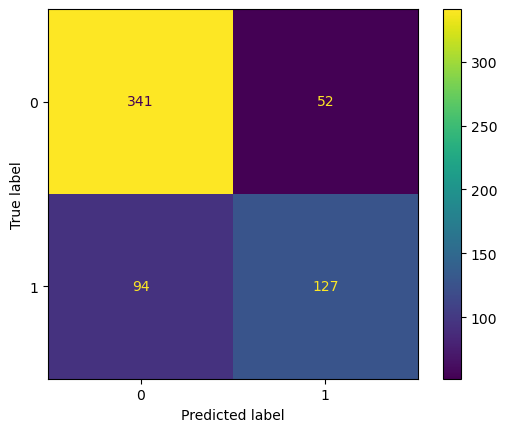

In [81]:
cm_display = ConfusionMatrixDisplay(cm).plot()

## Predictions on Test Data

Next, let's do some predictions on the test data. Our example is quite basic. We didn't do and cross fold validation only because I want to keep the code straightforward for now. As with previous notebooks we'll refactor the code to use scikit learn features. 

In [82]:
# Predict y labels on the training data
y_test_pred_labs =  logreg.predict(X_test)

# Get the probabilities
y_test_pred_probs = logreg.predict_proba(X_test)

# Use the threshold of 0.5 (we could use something else if we wanted to)
my_labs = np.where(y_test_pred_probs[:,1] < 0.5,"neg","pos")

compare_preds_test = pd.DataFrame({'predicted':my_labs.tolist(),
                                       'actual_labs':y_test})
# Use crosstabs
confusion_matrix_test_05 = pd.crosstab(compare_preds_test['actual_labs'], 
                                     compare_preds_test['predicted'], 
                                     rownames=['Actual'], colnames=['Predicted'])
# Check out the table / matrix
print(confusion_matrix_test_05)

#tn, fp, fn, tp = confusion_matrix(y_test,logreg.predict(X_test)).ravel()
#print(confusion_matrix(y_test,logreg.predict(X_test)))

Predicted  neg  pos
Actual             
neg         98    9
pos         18   29


In [83]:
print("Test Accuracy:",round(confusion_matrix_test_05.values.diagonal().sum() 
                             / confusion_matrix_test_05.values.sum(),2))

# And this should match the output of the score method

print("Test Score:",round(logreg.score(X_test,y_test),2))


Test Accuracy: 0.82
Test Score: 0.82


## Evaluation

Is this okay ? Well, maybe. We could perhaps look at a cross-fold validation run but let's hold off on that for now. To better address the question of whether setting the threshold at 0.5 is the best thing to do we need to back up a bit and recall that we are dealing with a curve like the one below which is a sigmoid function. The idea is to take our probabilities, which range between 0 and 1, and then pick a threshold over which we would classify that person as being positive for diabetes.

<img src="pics/logitplot-1.png" width ="600" height=600>

## Selecting The Correct Threshold / Alpha

The temptation is to select 0.5 as the threshold such that if a returned probability exceeds 0.5 then we classify the associated subject as being “positive” for the disease. But then this assumes that the probabilities are distributed perfectly. Here is another view of the situation.

<img src="pics/pc.png" width ="650" height=650>

The above represents a perfect classifier wherein we can cleanly distinguish between True Positives and Negatives. Note that, the cutoff point is at 0.5 which represents an ideal case. However, in most situations, what we have is something like this:

<img src="pics/tnfp.png" width ="700" height=700>


### Moving The Threshold

What happens if we move our threshold towards 0 ? We would definitely get more of the actual positive cases. What if we moved it to say 0.1 ? We would probably get ALL of the True Positives at the expense of getting a lot of False Positives.

What happens if we move our threshold towards 1 ? We would definitely get more of the actual negative cases. What if we moved it to say 0.9 ? We would probably get ALL of the True Negatives at the expense of getting a lot of False Negatives.

### Distribution of Predicted Probabilities

We might first wish to look at the distribution of the returned probabilities before making a decision about where to set the threshold. You should now be able to clearly see that simply selecting 0.5 as a deefault might not be the best approach - yet almost everyone does!  The boxplot here provides a very simple yet effective way to understand the distribution of these probabilities. 

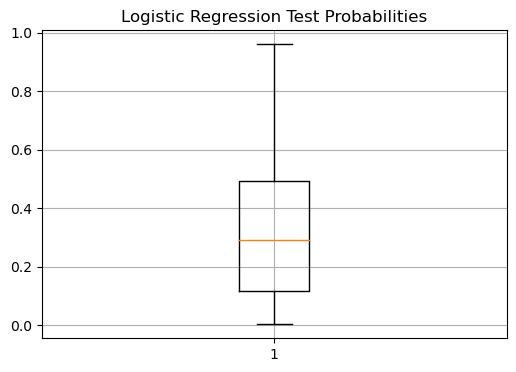

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(6, 4)) 
  
# Creating plot 
plt.boxplot(y_test_pred_probs[:,1]) 
plt.title("Logistic Regression Test Probabilities")
plt.grid()
# show plot 
plt.show() 

# The median is somewhere around .25 so we could use that for now 
# although we are just guessing.

So in viewing the plot it appears that the median is somewhere around 0.30. So we could experiment with setting the threshold around 0.30 or 0.25 to see if we can get a better accuracy. 

In [85]:
# Predict y labels on the test data
#y_test_pred_labs =  logreg.predict(X_test)
y_test_pred_probs = logreg.predict_proba(X_test)

# Use a threshold of 0.25
my_labs = np.where(y_test_pred_probs[:,1] < 0.25,"neg","pos")

compare_preds_test = pd.DataFrame({'predicted':my_labs.tolist(),
                                   'actual_labs':y_test})
# Use crosstabs
confusion_matrix_test_025 = pd.crosstab(compare_preds_test['actual_labs'], 
                                    compare_preds_test['predicted'], 
                                    rownames=['Actual'], 
                                    colnames=['Predicted'])
# Check out the matrix
confusion_matrix_test_025

Predicted,neg,pos
Actual,,
neg,67,40
pos,4,43


In [86]:
print("Test Accuracy:",round(confusion_matrix_test_025.values.diagonal().sum() / 
                             confusion_matrix_test_025.values.sum(),2))

Test Accuracy: 0.71


So what are we doing here? I don't know really. What about trying 0.28? Or 0.31? Just trying random thresholds? In a way we are but if we consult the boxplot we might at least have an educated guess. Nonetheless, a systematic approach might be better.  

## Hypothesis Testing

Now, before we dig into the details our classifier, remember that most things in statistics and classification revolves around the idea of a hypothesis. In this case, the “null” hypothesis is that a patient does NOT have the disease whereas the alternative hypothesis is that they do. Well, for a statistician that’s a bit strong. Let’s just say that if there is enough evidence to reject the null hypothesis then we will.

Anyway, the larger idea is that we might apply our test to someone and subsequently determine, by mistake, that they have a disease when in fact they don’t.

- This would be an example of a "false positive" also known as a "Type I Error".  

It is also possible that we apply the test to someone and we say that the do not have the disease when they actually do.

- This is known as a "false negative" also known as a Type II Error" 

Here we fail to reject the null hypothesis for this person. A perfect test would have zero false positives and zero false negatives.

<img src="pics/type2and1.png" width ="650" height=650>

## Confusion Matrix

So now we have our predictions in terms of actual labels that we could then use to compare to the actual labels that are stored in the “diabetes” column of the test data frame. This table provides the basis for computing a number of performance measures such as accuracy, precision, sensitivity, specificity and others. In predictive modeling we are always interested in how well any given model will perform on “new” data. You will hear the term "Confusion Matrix" or "Matrix of Confusion" when discussing classification problems. 

In [87]:
confusion_matrix_test_05

Predicted,neg,pos
Actual,,
neg,98,9
pos,18,29


Let’s break this down since it is really important to know how to use this construct. First, we notice that there are N = 154 people in this study. Note that scikit-learn has a function that will create a confusion matrix for us but if we started with this, we wouldn't learn a larger lession. If we go back to the original test prediction which used 0.5 as a threshold, we would have the following matrix.

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat_test = confusion_matrix(y_test, logreg.predict(X_test))
#print(conf_mat_test)
tn, fp, fn, tp = conf_mat_test.ravel()
confusion_matrix_test_05

tn, fp, fn, tp = confusion_matrix_test_05.values.ravel()
print("TN: ",tn," FN:",fn)
print("FP: ",fp,"  TP:",tp)

TN:  98  FN: 18
FP:  9   TP: 29


<img src="pics/big_mat.png" width ="650" height=650>

*True Positives* - With respect to the second row - we predicted that 29 people have the disease that actually do have it. You could then say that the number of TRUE POSITIVES (abbreviated as “TP”) is 29.

*False Positives* - We also predicted that 9  people have the condition when they in fact do not. We could then say that the number of FALSE POSITIVES, abbreviated as “FP”, is 9.

*False Negatives* - In the first row we predicted that 18 people do NOT have the disease/condition when they actually do. So you could say that the number of FALSE NEGATIVES (abbreviated as FN) is 18.

*True Negatives* - We also predicted that 98 people do not have the condition and they do not. So then the number of TRUE NEGATIVES (abbreviated as TN) is also 98.

## Computing Performance Metrics

Now comes the fun part in that you might be concerned with specific metrics to assess the quality of your model in specific terms. Since our model, such as it is, seems to relate to the quality of a medical diagnostic we might be concerned with its accuracy, precision, and sensitivity.

The first two terms in particular are frequently used synonymously when they are not the same thing. Below is a graphic from Wikipedia which presents many (if not all) of the metrics that can be computed against a confusion matrix.

<img src="pics/cmwiki.png" width ="700" height=700>

We’ll focus on some specific metrics as they will assist our understanding of how to assess a model. Here is what the current test confusion matrix looks like - the one based on a threshold of 0.5

<img src="pics/python_orient.png" width ="700" height=700>


### Accuracy

So let’s take the number of observed True Positives and True Negatives, add them together, and divide them by the total number of patients in the study group to arrive at what is known as the Accuracy of our model. Another way to think of the denominator is as the sum of all observed results, True and False.

Accuracy = (TP + TN) / (TP + TN + FP + FN) = (98 + 29)/154 = 0.82

In [89]:
round((tp+tn)/(tp+tn+fp+fn),2)

0.82

### Sensitivity

Sensitivity, also known as the True Positive rate, tells us how frequently we find a positive case given that it is actually positive. It is the number of True Positives (TP) divided by the sum of True Positives and False Negatives (which are actually Positives). This

Sensitivity = TP / (TP + FN) = 29 / (29 + 18) = 0.62

Sensitivity also has the synonyms of “recall” and “hit rate” which might be referenced depending on your domain on interest.

In [90]:
round(tp/(tp+fn),2)

0.62

### False Positive Rate

Just as there is the True Positive Rate there is a False Positive Rate. This tells us how likely it is we will falsely reject the null hypothesis which is a Type I error.

False Positive Rate = FP / (FP + TN) = 9 / (9 + 98 ) = .08

In [91]:
round(fp/(fp+tn),2)

0.08

### Specificity

Specificity tells us how frequently we find a negative case given that it is actually negative. This is also known as the “True Negative Rate”

Specificity = TN / (TN + FP) = 98 / (98 + 9) = 0.92

In [92]:
round(tn/(tn+fp),2)

0.92

### Precision

How precise is the model ? Precision is a measure of the ability of a classification model to identify only the relevant data points. This is also known as Positive Predictive Value. We take the number of True Positives (TP) and divide that by the sum of True Positives (TP) and False Positives (FP). The denominator is the sum of row 2 in our matrix.

It is helpful to know that Precision is also known as the PPV “Positive Predictive Value” since it is concerned with the ratio of True Positives over the sum of all Positive related quantities including the False Positives. The larger the number of FP then the smaller the ratio which results in a lower precision.

Precision = TP / (TP + FP) = 29 / (29 + 9) = 0.76

In [93]:
round(tp/(tp+fp),2)

0.76


## Picking the Right Metric

There are more ratios we could compute some of which might be more relevant to our classification issue. In reality, picking the “right” metric is a function of your domain of study. 

Frequently, the sensitivity and specificity are used in medical testing scenarios as is the false positive rate. But you should search the literature in your area of interest to determine what is commonly used. 

We could say much more about these metrics but we’ll keep it simple for now. For now, we’ll use both the True Positive Rate and the False Positive Rate.

## Wait. Where Are We ?

<img src="pics/confuseb.jpg" width=500 height=500 />
"Confused" by CollegeDegrees360 is licensed under CC BY-SA 2.0. 

<br>
<br>

So We’ve been doing a lot. We did the following:

1. Built a model against the training data
2. Used the model to make a prediction against the test data
3. Took the probabilities from Step #2 and
4. Selected a threshold / alpha value (e.g. 0.3) and
5. Decided that probabilities over that threshold would be “pos”
6. Created a table of outcomes (confusion matrix) to compare predictions vs reality
7. Computed some important ratios (e.g. accuracy, sensitivity, specificity)

While this process was useful, the resulting confusion matrix corresponded to just ONE particular threshold ? What if we had picked another value ? We would then get a different confusion matrix as well as different performance measures.

    In effect we would have to repeat steps 4-7 all over again for each threshold !!!

Let’s find a way to generalize these steps. First, let’s create a function that allows us to compute the following:

- True Positive Rate (aka “Sensitivity”)
- False Positive Rate ( 1 - Specificity).

If we apply it to our predictions from our example in progress, the output would be as follows.

In [94]:
def get_tprfpr(thresh,probs,true):
    
    # Generate labels based on the threshold
    my_labs = np.where(y_test_pred_probs[:,1] < thresh,"neg","pos")

    compare_preds_test = pd.DataFrame({'predicted':my_labs,
                                       'actual_labs':true})
    # Use crosstabs
    cmt = pd.crosstab(compare_preds_test['actual_labs'], 
                                    compare_preds_test['predicted'], 
                                    rownames=['Actual'], 
                                    colnames=['Predicted'])
    # get tpr and fpr
    tpr = cmt.iloc[1,1]/(cmt.iloc[1,1]+cmt.iloc[1,0])
    fpr = cmt.iloc[0,1]/(cmt.iloc[0,1]+cmt.iloc[0,0])
    
    return([round(thresh,2),round(tpr,2),round(fpr,2)])

# Predict y labels on the test data

y_test_pred_probs =  logreg.predict_proba(X_test)

# Call the function to get back threshold, tpr, and fpr
get_tprfpr(.3,y_test_pred_probs,y_test)

[0.3, 0.87, 0.32]

## ROC Curve

Next, we'll use this function to evaluate a number of thresholds to see what the resulting True Postive and False Positive Rates are. We can then use this information to create a ROC Curve which is a popular diagnostic graph for picking the optimal threshold for use with the prediction of labels. Again, most people will accept whatever default threshold the predict method uses which is almost always 0.5. But this isn't set in stone which is why things like ROC curves exist. Here is what a ROC Curve might look like in the context of a research paper (image from Wikipedia page on ROC Curves)

<center><img src="pics/Roccurves.png" width=400 height=400 /></center>
See Wikipedia entry for image

<br>
<br>

More formally, a Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR), also known as sensitivity, against the False Positive Rate (FPR), also known as the fall-out, at various threshold settings.

From Wikipedia:

> The ROC curve was first developed by electrical engineers and radar engineers during World War II for detecting enemy objects in battlefields, starting in 1941, which led to its name ("receiver operating characteristic").

Back to our example, we can use our code to generate True Positive Rates and False Positive Rates for a given threshold. It's not hard to do so we'll look at a range of thresholds from around .1 up to .95. This will enable us to plot a curve of TPR vs FPR. Since it's a curve we can also consider the area contained underneath it as a possible measure or metric. 


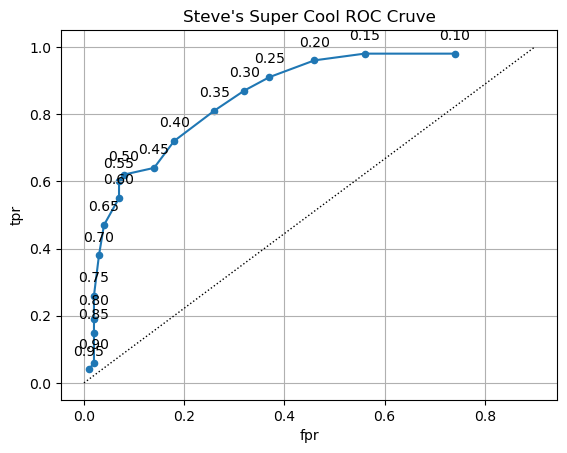

In [95]:
import matplotlib.pyplot as plt
thresholds = np.arange(.1,1,.05)
probs =  logreg.predict_proba(X_test)
df = []

for i in thresholds:
    df.append(get_tprfpr(i,probs,y_test))

roc_stuff = pd.DataFrame(df,columns=['threshold','tpr','fpr'])
roc_stuff.plot(x ='fpr', y='tpr', kind = 'scatter')
plt.plot(roc_stuff.fpr, roc_stuff.tpr)
plt.grid()
plt.title("Steve's Super Cool ROC Cruve")

# zip joins x and y coordinates in pairs
ii = 0
for x,y in zip(roc_stuff.fpr, roc_stuff.tpr):

    label = "{:.2f}".format(roc_stuff.threshold[ii])

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    ii = ii + 1

plt.plot([0, .9], [0, 1], color = 'black', linewidth = 1, linestyle="dotted")
plt.show()

So it turns out that area under an ROC curve is a measure of the usefulness of a test in general, where a greater area (with respect to TPR and FPR) means a more useful test. Ideally we would want the area under the curve (also known as “AUC”) to be as close to 1 as possible. 

The dashed line above represents a classifier that basically “guesses” the outcome (pos vs neg) using a “coin flip” mentality. So, this seems like a lot of work on our part and it is. We could leverage the power of scikit-learn to give us some help.

In case you are wondering, there is a command in R which will make the curve for you. We need to use the prediction PROBABILITES as part of the call to the **plot_roc_curve** function. We also pass in the actual labels for comparison.

AUC is: 0.87


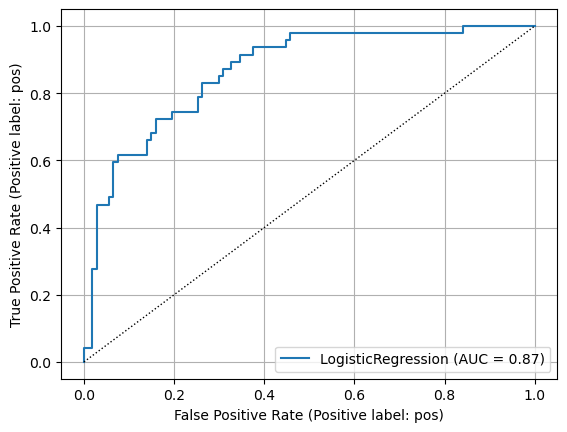

In [96]:
from sklearn import metrics
 
# Plot the ROC Curve
#metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.RocCurveDisplay.from_estimator(logreg, X_test, y_test)

# If you want you can get the supporting data
tpr, fpr, thresholds = metrics.roc_curve(y_test,logreg.predict_proba(X_test)[:,1],
                                         pos_label="pos")
print("AUC is:",round(metrics.roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1]),2))

plt.grid()
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 1, linestyle="dotted")

Here are some more examples of general curves including one that is “perfect”. B and C are okay where as D represents mere guessing.

<img src="pics/multirocs.png" width ="600" height=600>

Here is another view of the ROC Curve

<img src="pics/croc.png" width ="600" height=600>


So, our classifier does better than that but certainly not perfectly. Now, we also care about the threshold that gives us a good balance between the TPR and FPR. I mean if we wanted a max AUC with no other concerns, we would also be accepting a very high FPR. So this is why looking at the curve is useful. In looking at the ROC Curve it seems like the threshold which yields the largest AUC is around .35 or .38. We could use that to generate a confusion matrix to see what type of accurcay that yields.

In [97]:
y_test_pred_probs = logreg.predict_proba(X_test)

# Use a threshold of 0.38
my_labs = np.where(y_test_pred_probs[:,1] < 0.4,"neg","pos")

compare_preds_test = pd.DataFrame({'predicted':my_labs.tolist(),
                                   'actual_labs':y_test})
# Use crosstabs
confusion_matrix_test_038 = pd.crosstab(compare_preds_test['actual_labs'], 
                                    compare_preds_test['predicted'], 
                                    rownames=['Actual'], 
                                    colnames=['Predicted'])
# Check out the matrix
confusion_matrix_test_038
print("Accuracy is:",round(confusion_matrix_test_038.values.diagonal().sum()/confusion_matrix_test_038.values.sum(),2))

Accuracy is: 0.79


## ROC Curve Summary

The above can be confusing although what you will soon discover is that being able to compute the AUC (Area Under Curve) will be sufficient to judge the quality of a model - well in general it’s a good start. 

You might want to put up a ROC curve based on some predictions in which case you would still need to use one of the above functions. If you just want to see a basic ROC Curve then take this approach which will give you both the AUC and a ROC Curve albeit it much less “pretty” than the one above. 

## Let's Try This Again

Let's try this again using as much of the scikit-learn conveniences that we can.


recall:  0.6170212765957447
              precision    recall  f1-score   support

         neg       0.84      0.92      0.88       107
         pos       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



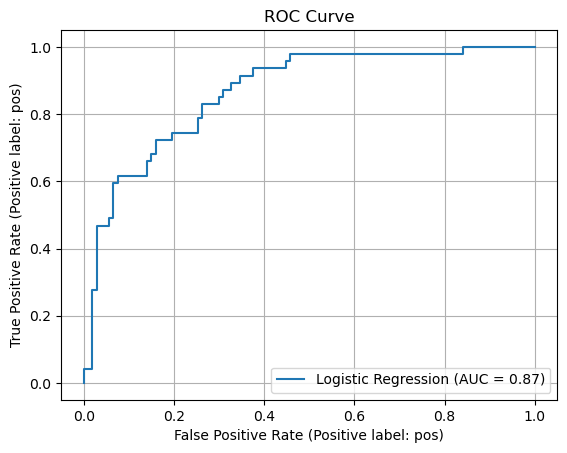

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

### Get The Data Organized

# Specify the predictor data 
X = pm.iloc[:,0:8]

# Specify the target labels and flatten the array to make it consumable
# by scikit-learn functions

y = np.ravel(pm.diabetes)

# Scale the predictor data
X_scaled = preprocessing.scale(X)

# Create the train / test module
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,
                                                 test_size=0.20,random_state=0)

###  Now Do Some Modeling

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train,y_train)

# Predict y labels on the training data - assumes a threshold of 0.5
y_test_pred_labs =  logreg.predict(X_test)

# Get the probabilities
y_test_pred_probs = logreg.predict_proba(X_test)

### Print Out Some Diagnostic Information

print("recall: ", recall_score(y_test,logreg.predict(X_test),pos_label="pos"))

#tn, fp, fn, tp  = confusion_matrix(y_test,y_test_pred_labs,labels=['neg','pos']).ravel()

# Get the Classification Report
print(classification_report(y_test,y_test_pred_labs))

# Check Out the ROC Curve
#metrics.plot_roc_curve(logreg, X_test, y_test, name="ROC")
metrics.RocCurveDisplay.from_estimator(logreg, X_test, y_test, name="Logistic Regression")
plt.title("ROC Curve")
plt.grid()

## K-Fold Validation

Just as with regression we can do K-Fold Validation on one ore more performance measures such as accuracy, sensitivity, precision, etc. We did this before when considering linear regression. There is a very direct and easy way to do this - so easy in fact that if we do it then we can't really appreciate what is happening under the hood. As before, we'll use the **KFold** function to create folds from the original data. We'll then use the **accuracy_score** function assess the accuracy of the folds in a way that uses K-1 of the folds as training data and the holdout fold as a test fold. Then we collect the accuracies for each iteration and present an average at the end of the loop.

Accuracy for fold 0 is 0.82
Accuracy for fold 1 is 0.79
Accuracy for fold 2 is 0.75
Accuracy for fold 3 is 0.73
Accuracy for fold 4 is 0.74
Avg Accuracy Across All Folds : 0.76


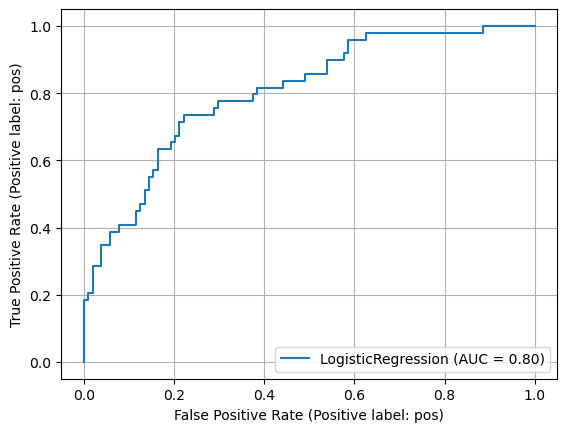

In [125]:
from sklearn.model_selection import KFold 

# Set up some folds
k = 5
kf = KFold(n_splits=k, random_state=False, shuffle=True)

# Create A Model
model = LogisticRegression(solver= 'liblinear')
 
# Setup a List to accumulate stuff
acc_score = []

# Setup a Counter
i = 0
 
# We can loop across each of the five folds
for train_index , test_index in kf.split(X):
    
    # Setup training on k-1 folds
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    # Fit the model
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    # Accumulate the accuracies
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    mystr = "Accuracy for fold " + str(i) + " is " + str(round(acc,2)) 
    print(mystr)
    i = i + 1
    
# Get the averages
avg_acc_score = sum(acc_score)/k

# Print out some stuff
print('Avg Accuracy Across All Folds : {}'.format(round(avg_acc_score,2)))

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.grid()

An even more direct way to look at this is by pass the processing of individual folds and use the **cross_val_score** function which hides all the details and presents final results for consideration. 

In [100]:
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k, random_state=None)

# Setup a Model
model = LogisticRegression(solver= 'liblinear')

# Get the results 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(round(result.mean(),2)))

Avg accuracy: 0.76


In this next example, we are using a different scoring method than just accuracy. 

In [101]:
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

# So we create a dictionary with multiple macros
# for assessing score
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}

# Five Folds
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

# Here we get the training information back
result = cross_validate(model, X, y, scoring=scoring, return_train_score=True)

# Look at what we get back
result


{'fit_time': array([0.00706887, 0.00506592, 0.00380492, 0.0031538 , 0.00342798]),
 'score_time': array([0.00462103, 0.0043242 , 0.00294209, 0.00261712, 0.00240803]),
 'test_prec_macro': array([0.74303907, 0.72903846, 0.75204918, 0.7964939 , 0.7527959 ]),
 'train_prec_macro': array([0.77340163, 0.76140921, 0.77223756, 0.75451486, 0.78227455]),
 'test_rec_macro': array([0.70851852, 0.72055556, 0.68222222, 0.75688679, 0.70471698]),
 'train_rec_macro': array([0.72820093, 0.72537383, 0.73379673, 0.71369186, 0.74087209])}

## Precision / Recall Curve

Another approach to determining what might be the best threshold is to plot the precision and recall (also known as sensitivity) as a function of various thresholds. This gives us some idea as to where the sensitivity is the highest in relation to the precision (or vice versa). Ideally, one would like to have both high precesion and sensitivity (aka recall) though as with other performance measures, a compromise is typically involved. High sensitivity is valued when identifying serious diseases because when we say someone is positive for a disease we would very much like for that to be true. Even if we classify a few people as being positive who might not be (a type I error) it's better than identiyfing them as being negative when they really aren't (type II error). 

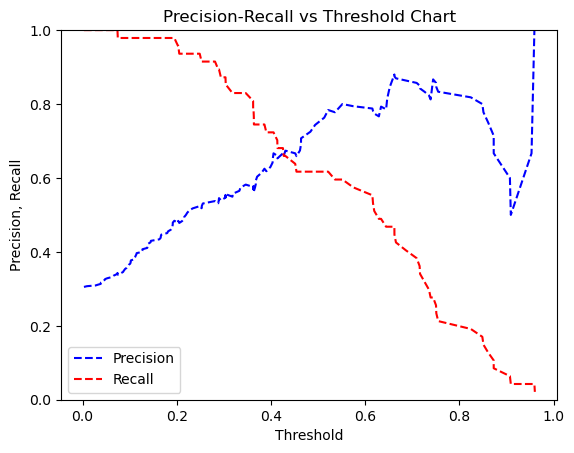

In [108]:
# Predict y labels on the test data

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,
                                                 test_size=0.20,random_state=0)

y_test_pred_labs =  logreg.predict(X_test)
y_test_pred_probs = logreg.predict_proba(X_test)

  # probs_y is a 2-D array of probability of being labeled as 0 (first 

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

onezero_labs = np.where(y_test == "neg",0,1)

precision, recall, thresholds = precision_recall_curve(onezero_labs, 
                                                       y_test_pred_probs[:,1]) 

# Retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

In [117]:
precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1],pos_label="pos")

(array([0.30519481, 0.30718954, 0.30921053, 0.31125828, 0.31333333,
        0.31543624, 0.31756757, 0.31972789, 0.32191781, 0.32413793,
        0.32638889, 0.32867133, 0.33098592, 0.33333333, 0.33571429,
        0.3381295 , 0.34057971, 0.34306569, 0.33823529, 0.34074074,
        0.34328358, 0.34586466, 0.34848485, 0.35114504, 0.35384615,
        0.35658915, 0.359375  , 0.36220472, 0.36507937, 0.368     ,
        0.37096774, 0.37398374, 0.37704918, 0.38016529, 0.38333333,
        0.38655462, 0.38983051, 0.39316239, 0.39655172, 0.4       ,
        0.40350877, 0.40707965, 0.41071429, 0.41441441, 0.41818182,
        0.42201835, 0.42592593, 0.42990654, 0.43396226, 0.43809524,
        0.44230769, 0.44660194, 0.45098039, 0.45544554, 0.46      ,
        0.46464646, 0.46938776, 0.4742268 , 0.47916667, 0.48421053,
        0.4787234 , 0.48387097, 0.47826087, 0.48351648, 0.48888889,
        0.49438202, 0.5       , 0.50574713, 0.51162791, 0.51764706,
        0.52380952, 0.51807229, 0.52439024, 0.53

In [118]:
recall[137]
precision[137]

0.8235294117647058

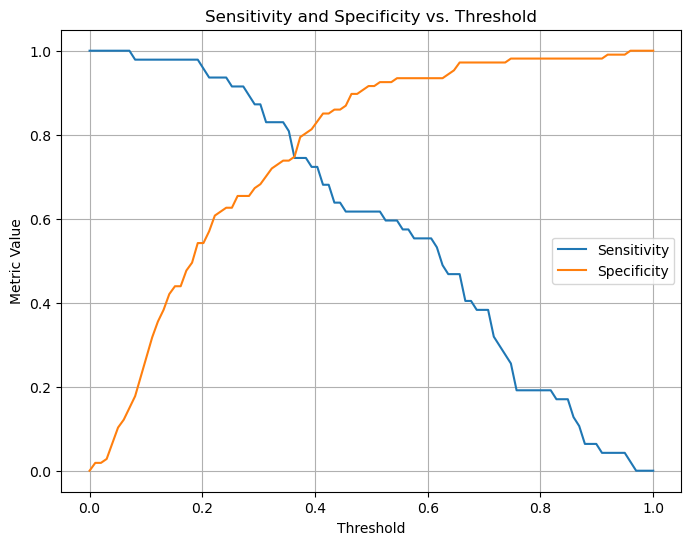

In [119]:
# Obtain predicted probabilities for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Initialize lists to store sensitivity and specificity values
sensitivities = []
specificities = []

# Compute sensitivity and specificity for each threshold
for threshold in thresholds:
    # Classify samples based on threshold

    y_pred = np.where(y_proba >= threshold, 'pos', 'neg')
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=['neg', 'pos']).ravel()
    
    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # And make sure to collect these
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Plot sensitivity-specificity curve - this is not commonly done
# except to make the point about picking a good threshold.

plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivities, label='Sensitivity')
plt.plot(thresholds, specificities, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Sensitivity and Specificity vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'ROC Curve')

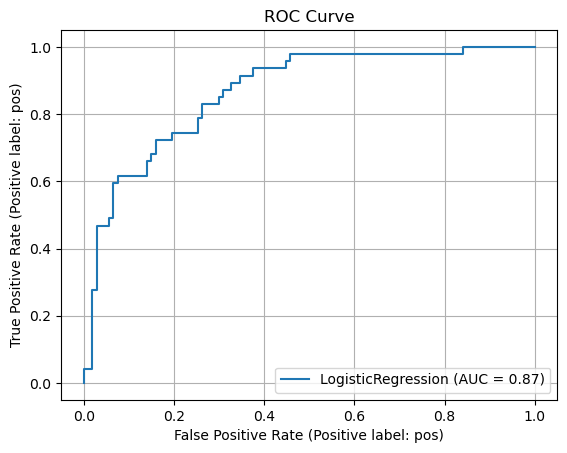

In [123]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.grid()
plt.title("ROC Curve")

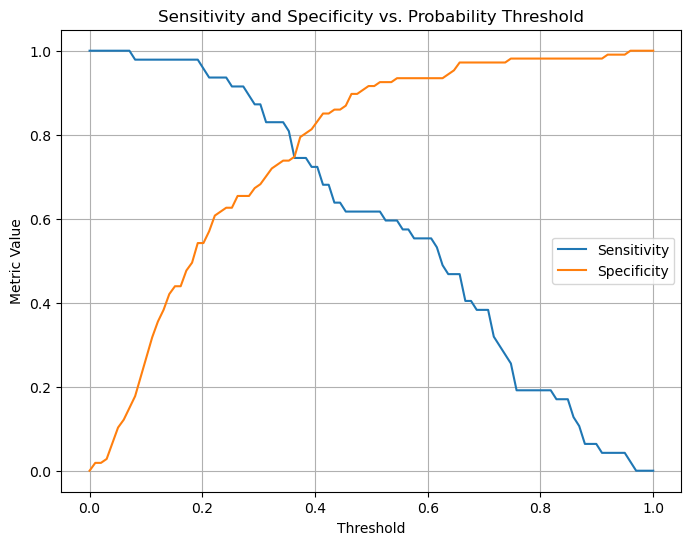

In [124]:
# Obtain predicted probabilities for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Initialize lists to store sensitivity and specificity values
sensitivities = []
specificities = []

# Compute sensitivity and specificity for each threshold
for threshold in thresholds:
    # Classify samples based on threshold

    y_pred = np.where(y_proba >= threshold, 'pos', 'neg')
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=['neg', 'pos']).ravel()
    
    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # And make sure to collect these
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Plot sensitivity-specificity curve - this is not commonly done
# except to make the point about picking a good threshold.

plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivities, label='Sensitivity')
plt.plot(thresholds, specificities, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Sensitivity and Specificity vs. Probability Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
pm.diabetes.value_counts()

diabetes
neg    500
pos    268
Name: count, dtype: int64